In [55]:
ls

Dataset/  fruit-classification-model.tgz  fruit.h5


In [78]:
! pip install tensorflow==2.4
! pip install keras
! pip install pillow
! pip install opencv-python
! pip install albumentations
! pip install scikit-learn
! pip install matplotlib
! pip install numpy
! pip install seaborn

ERROR: Could not find a version that satisfies the requirement tensorflow==2.4 (from versions: 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.4


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
import cv2
from PIL import Image
import random
from albumentations import *
from tqdm import tqdm

In [4]:
AUG = [ HorizontalFlip, ShiftScaleRotate, RandomRotate90, RandomBrightnessContrast,
        Transpose, ShiftScaleRotate, Blur, OpticalDistortion, GridDistortion ]
print(len(AUG))

9


In [7]:
pwd

'/home/wsuser/work'

In [15]:

import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
cos_client = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='XEBaufxql_174F_7IJZ9I7idK28_TOn871Dsql3Ldv2G',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.private.us.cloud-object-storage.appdomain.cloud')

bucket = 'fruitclassification-donotdelete-pr-73b5msb7ygk5mp'
object_key = 'Dataset.zip'

streaming_body_2 = cos_client.get_object(Bucket=bucket, Key=object_key)['Body']

# Your data file was loaded into a botocore.response.StreamingBody object.
# Please read the documentation of ibm_boto3 and pandas to learn more about the possibilities to load the data.
# ibm_boto3 documentation: https://ibm.github.io/ibm-cos-sdk-python/
# pandas documentation: http://pandas.pydata.org/
from io import BytesIO
import zipfile
unzip = zipfile.ZipFile(BytesIO(streaming_body_2.read()),'r')
file_paths = unzip.namelist()
for path in file_paths:
    unzip.extract(path)

In [21]:
filenames = os.listdir('/home/wsuser/work/Dataset/TEST_SET')
print(filenames)

['BANANA', 'istockphoto-1357864202-170667a.jpeg', 'istockphoto-1357864202-170667a(1).jpeg', 'APPLES', 'ORANGE']


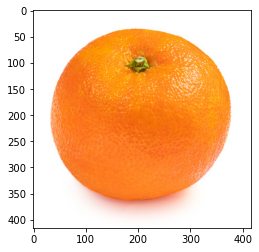

In [22]:
path0="/home/wsuser/work/Dataset/TEST_SET/istockphoto-1357864202-170667a.jpeg"
image0c=cv2.imread(path0)
aug=AUG[0](p=1)
image2c=aug(image=image0c)['image']
plt.figure(figsize=(4,4))
plt.imshow(cv2.cvtColor(image2c,cv2.COLOR_BGR2RGB))
plt.show()

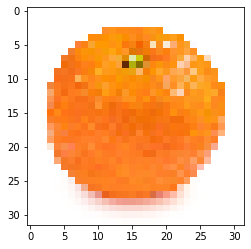

In [23]:
image0a=load_img(path0, grayscale=False, color_mode='rgb', target_size=(32,32))
image1a=np.asarray(image0a)
aug=AUG[0](p=1)
image2a=aug(image=image1a)['image']
plt.figure(figsize=(4,4))
plt.imshow(image2a)
plt.show()

In [24]:
data_dir = '/home/wsuser/work/Dataset/TRAIN_SET'

In [25]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
print(Name)
print(len(Name))

['PINEAPPLE', 'BANANA', 'WATERMELON', 'APPLES', 'ORANGE']
5


In [26]:
N=[]
for i in range(len(Name)):
    N+=[i]

normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [27]:
dataset=[]
datalabel=[]
count=0
for file in tqdm(os.listdir(data_dir)):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image0=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(32,32))
        image1=np.asarray(image0)
        for i in range(len(AUG)):
            aug=AUG[i](p=1)
            image2=aug(image=image1)['image']       
            image3=image2/255.0
            if image3.sum()>20:
                dataset+=[image3]
                datalabel+=[count]        
    count=count+1


100%|██████████| 5/5 [00:14<00:00,  2.89s/it]


In [28]:
m=len(dataset)
print(m)
M=[]
for i in range(m):
    M+=[i]
random.seed(2021)
random.shuffle(M)

trainX=np.array(dataset)[M[0:(m//4)*3]]
testX=np.array(dataset)[M[(m//4)*3:]]
trainY=np.array(datalabel)[M[0:(m//4)*3]]
testY=np.array(datalabel)[M[(m//4)*3:]]

37062


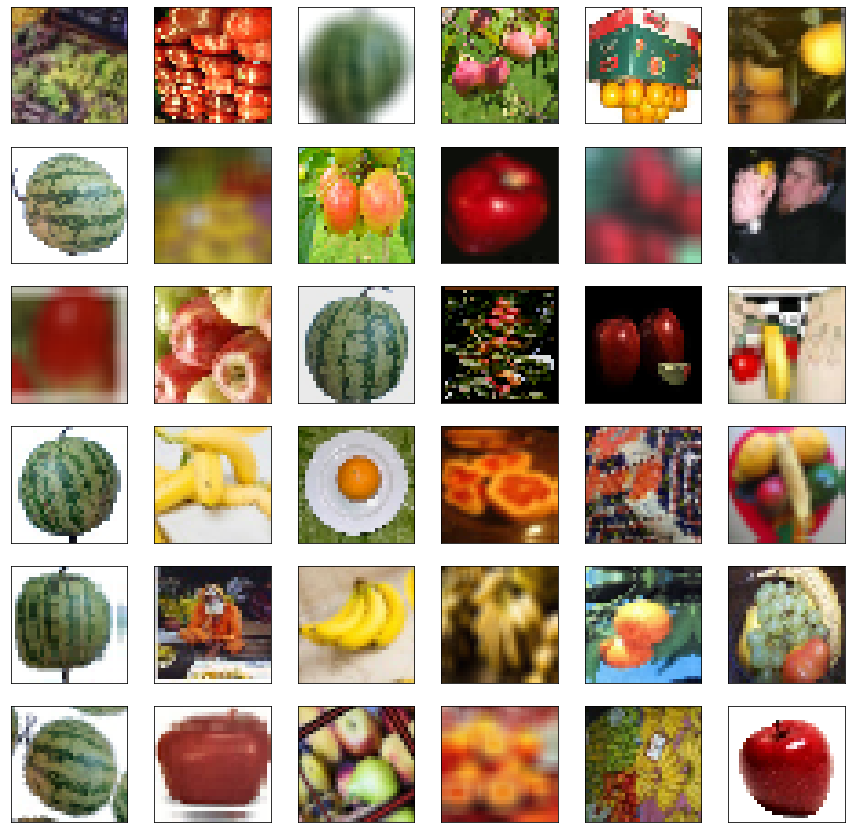

In [29]:
fig,axs = plt.subplots(6,6,figsize=(15,15))
for i in range(36):
    image=dataset[M[i]]
    r=i//6
    c=i%6
    axs[r][c].set_xticks([])
    axs[r][c].set_yticks([])
    ax=axs[r][c].imshow(image)
plt.show()

In [30]:
trainlabels1=to_categorical(trainY)
trainlabels=np.array(trainlabels1)

In [31]:
trainx,testx,trainy,testy=train_test_split(trainX,trainlabels,test_size=0.2,random_state=44)

In [32]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(22236, 32, 32, 3)
(5559, 32, 32, 3)
(22236, 5)
(5559, 5)


In [33]:
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=20,zoom_range=0.2,
                        width_shift_range=0.2,height_shift_range=0.2,shear_range=0.1,fill_mode="nearest")

In [34]:
pretrained_model3 = tf.keras.applications.DenseNet201(input_shape=(32,32,3),include_top=False,weights='imagenet',pooling='avg')
pretrained_model3.trainable = False

74850304/74836368 [==============================] - 1s 0us/step


In [35]:
inputs3 = pretrained_model3.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model3.output)
outputs3 = tf.keras.layers.Dense(5, activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs3, outputs=outputs3)

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [37]:
his=model.fit(datagen.flow(trainx,trainy,batch_size=32),validation_data=(testx,testy),epochs=10)

Epoch 1/10
695/695 [==============================] - 167s 223ms/step - loss: 0.3967 - accuracy: 0.8466 - val_loss: 0.3204 - val_accuracy: 0.8768
Epoch 2/10
695/695 [==============================] - 149s 214ms/step - loss: 0.3164 - accuracy: 0.8757 - val_loss: 0.2730 - val_accuracy: 0.8948
Epoch 3/10
695/695 [==============================] - 149s 215ms/step - loss: 0.2888 - accuracy: 0.8848 - val_loss: 0.2938 - val_accuracy: 0.8836
Epoch 4/10
695/695 [==============================] - 148s 212ms/step - loss: 0.2778 - accuracy: 0.8907 - val_loss: 0.2518 - val_accuracy: 0.8994
Epoch 5/10
695/695 [==============================] - 149s 215ms/step - loss: 0.2592 - accuracy: 0.8988 - val_loss: 0.2444 - val_accuracy: 0.9016
Epoch 6/10
695/695 [==============================] - 148s 213ms/step - loss: 0.2509 - accuracy: 0.8998 - val_loss: 0.2305 - val_accuracy: 0.9133
Epoch 7/10
695/695 [==============================] - 152s 219ms/step - loss: 0.2459 - accuracy: 0.9047 - val_loss: 0.2455 -

In [38]:
testlabels1=to_categorical(testY)
testlabels=np.array(testlabels1)

In [39]:
y_pred=model.predict(testX)
pred=np.argmax(y_pred,axis=1)
ground=np.argmax(testlabels,axis=1)
print(classification_report(ground,pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       570
           1       0.92      0.89      0.90      3088
           2       0.99      1.00      0.99      1090
           3       0.92      0.90      0.91      2233
           4       0.86      0.91      0.89      2286

    accuracy                           0.91      9267
   macro avg       0.93      0.94      0.93      9267
weighted avg       0.92      0.91      0.91      9267



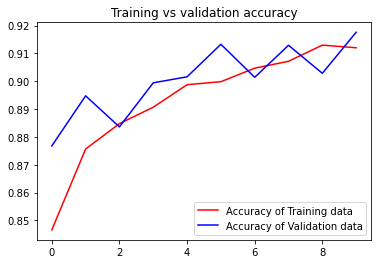

<Figure size 432x288 with 0 Axes>

In [40]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

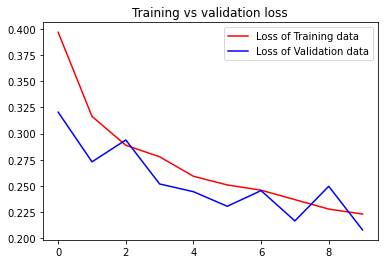

<Figure size 432x288 with 0 Axes>

In [41]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [45]:
pred2=model.predict(testX)

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

[1, 1, 4, 0, 1, 3, 2, 2, 1, 3]


In [46]:
ANS=list(testY)
print(ANS[0:10])

[4, 1, 4, 0, 1, 3, 2, 2, 1, 3]


In [47]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)

0.9148591777274199


In [48]:
model.save("fruit.h5")

In [49]:
ls

Dataset/  fruit.h5


In [50]:
!tar -zcvf fruit-classification-model.tgz fruit.h5

fruit.h5


In [52]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 15.6 MB/s eta 0:00:01


In [53]:
from ibm_watson_machine_learning import APIClient
wml_credential = {
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"ZywEv_bSYaPY1zBEMa84bcpaftdOoG-Q8D9pyPcx5yXy"
}

client = APIClient(wml_credential)

In [58]:
def guid_from_space_name(client, space_name):
    space = client.spaces.get_details()
    return(next(item for  item in space ['resources'] if item['entity']['name'] == space_name)['metadata']['id'])

In [59]:
space_uid = guid_from_space_name(client, 'fruit_classification')
print(space_uid)

3ffa1ce4-6f33-49d1-9439-afcec9e0d831


In [60]:
client.set.default_space(space_uid)

'SUCCESS'

In [61]:
client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12      020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9      0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt22.2-py3.10        125b6d9

In [83]:
software_spec_uid = client.software_specifications.get_uid_by_name('runtime-22.1-py3.9')
software_spec_uid

'12b83a17-24d8-5082-900f-0ab31fbfd3cb'

In [86]:
model_details = client.repository.store_model(model='fruit-classification-model.tgz',meta_props={
    client.repository.ModelMetaNames.NAME: "CNN",
    client.repository.ModelMetaNames.TYPE: "tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_spec_uid
})

model_id = client.repository.get_model_id(model_details)
model_id

'9377e68d-4db0-4a89-b478-7b0ebb1f76d0'